# Recommendation Systems (movie recommendation system)

A recommendation system is a type of information filtering system that predicts or suggests items of interest to users based on their preferences, behavior, or past interactions. Its primary goal is to provide personalized recommendations to users, helping them discover relevant items that they may not have found otherwise.

Recommendation systems are widely used in various domains, including e-commerce, streaming services, social media platforms, and online content providers. They utilize algorithms and techniques to analyze user data, such as past purchases, browsing history, ratings, and social connections, to generate recommendations.
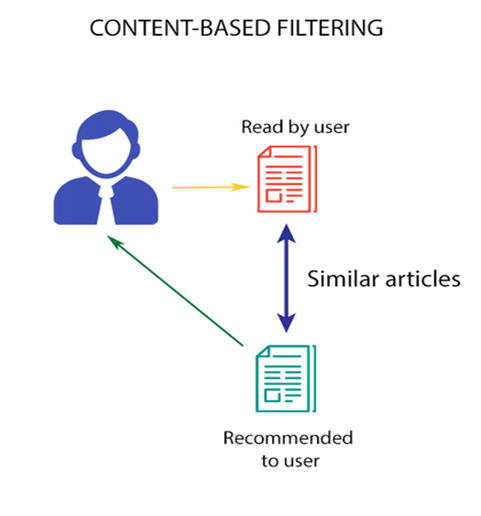


# There are different types of recommendation systems, including:

### 1. Content-based filtering: 
This approach recommends items based on their similarity to the items a user has liked or interacted with in the past. It uses item attributes or features to make recommendations. For example, if a user has watched several action movies in the past, a content-based system may recommend other action movies with similar themes or actors.

Examples: Netflix/Youtube predicting videos to your liking.

### 2. Collaborative filtering: 
This approach recommends items based on the preferences of similar users. It uses historical data from multiple users to find patterns and make predictions. There are two main types of collaborative filtering:

   - User-based collaborative filtering: It finds users who have similar preferences to the target user and recommends items that those similar users have liked or rated highly.

   - Item-based collaborative filtering: It identifies items that are similar to the ones the target user has shown interest in and recommends those similar items.



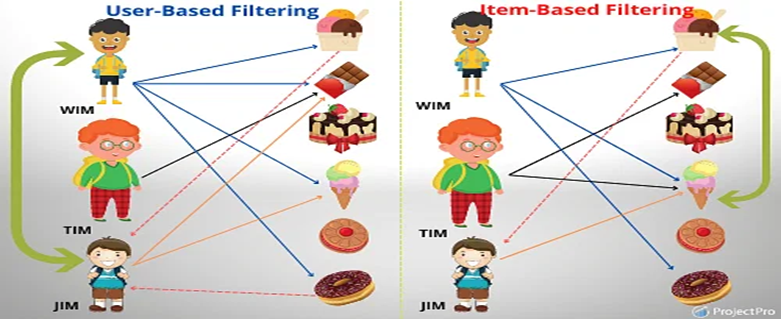

Example - 
### User-based: 
Amazon suggests new users products based on their purchase using purchases of previous customers. E.g If a person buys a mouse, he/she will be suggested a keyboard as well because some customers buy mouse and keyboard together.

Example - 
### Item-based : 
Amazon suggests users products based on their purchase using purchase data of previous customers. E.g If a user buys a mouse, he/she will be suggested with other types/brands of mouses.

### 3. Hybrid approaches: 
These combine multiple recommendation techniques, such as content-based and collaborative filtering, to provide more accurate and diverse recommendations. Hybrid approaches leverage the strengths of different methods to overcome limitations and improve overall recommendation quality.

Examples: Netflix's movies, Spotify's music, Facebook recommending friends, product recommendations of Amazon

Recommendation systems can greatly enhance user experience by reducing information overload, improving personalization, and helping users discover new items of interest. However, developing effective recommendation systems involves addressing challenges such as data sparsity, cold start problem (when there is limited or no user data), and scalability when dealing with large datasets and user bases.


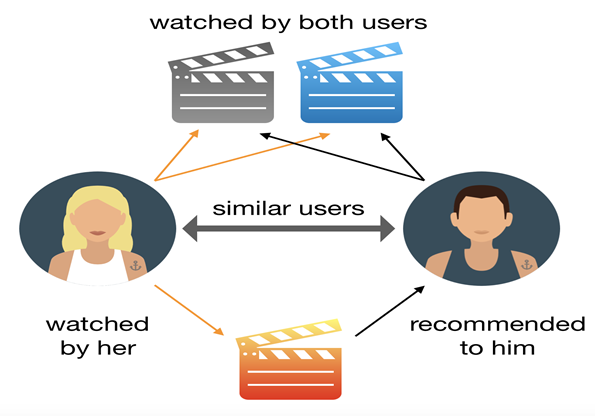

# importing the Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies=pd.read_csv('movies.csv')

ratings=pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


# Exploratory Data Analysis -EDA

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [7]:
movies.shape

(10329, 3)

In [8]:
ratings.shape

(105339, 4)

In [9]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


From the above table we can conclue that

The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively.
There are 668 user who has given their ratings for 149532 movies.

In [11]:
genres=[]
for genre in movies.genres:
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [12]:
movie_title

'[\'Toy Story\', \'Jumanji\', \'Grumpier Old Men\', \'Waiting to Exhale\', \'Father of the Bride Part II\', \'Heat\', \'Sabrina\', \'Tom and Huck\', \'Sudden Death\', \'GoldenEye\', \'American President, The\', \'Dracula: Dead and Loving It\', \'Balto\', \'Nixon\', \'Cutthroat Island\', \'Casino\', \'Sense and Sensibility\', \'Four Rooms\', \'Ace Ventura: When Nature Calls\', \'Money Train\', \'Get Shorty\', \'Copycat\', \'Assassins\', \'Powder\', \'Leaving Las Vegas\', \'Othello\', \'Now and Then\', \'Persuasion\', \'City of Lost Children, The (Cité des enfants perdus, La)\', \'Shanghai Triad (Yao a yao yao dao waipo qiao)\', \'Dangerous Minds\', \'Twelve Monkeys (a.k.a. 12 Monkeys)\', \'Wings of Courage\', \'Babe\', \'Carrington\', \'Dead Man Walking\', \'Clueless\', \'Cry, the Beloved Country\', \'Richard III\', \'Dead Presidents\', \'Restoration\', \'Mortal Kombat\', \'To Die For\', \'How to Make an American Quilt\', \'Seven (a.k.a. Se7en)\', \'Pocahontas\', \'When Night Is Falling

# Data Visualization

In [13]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

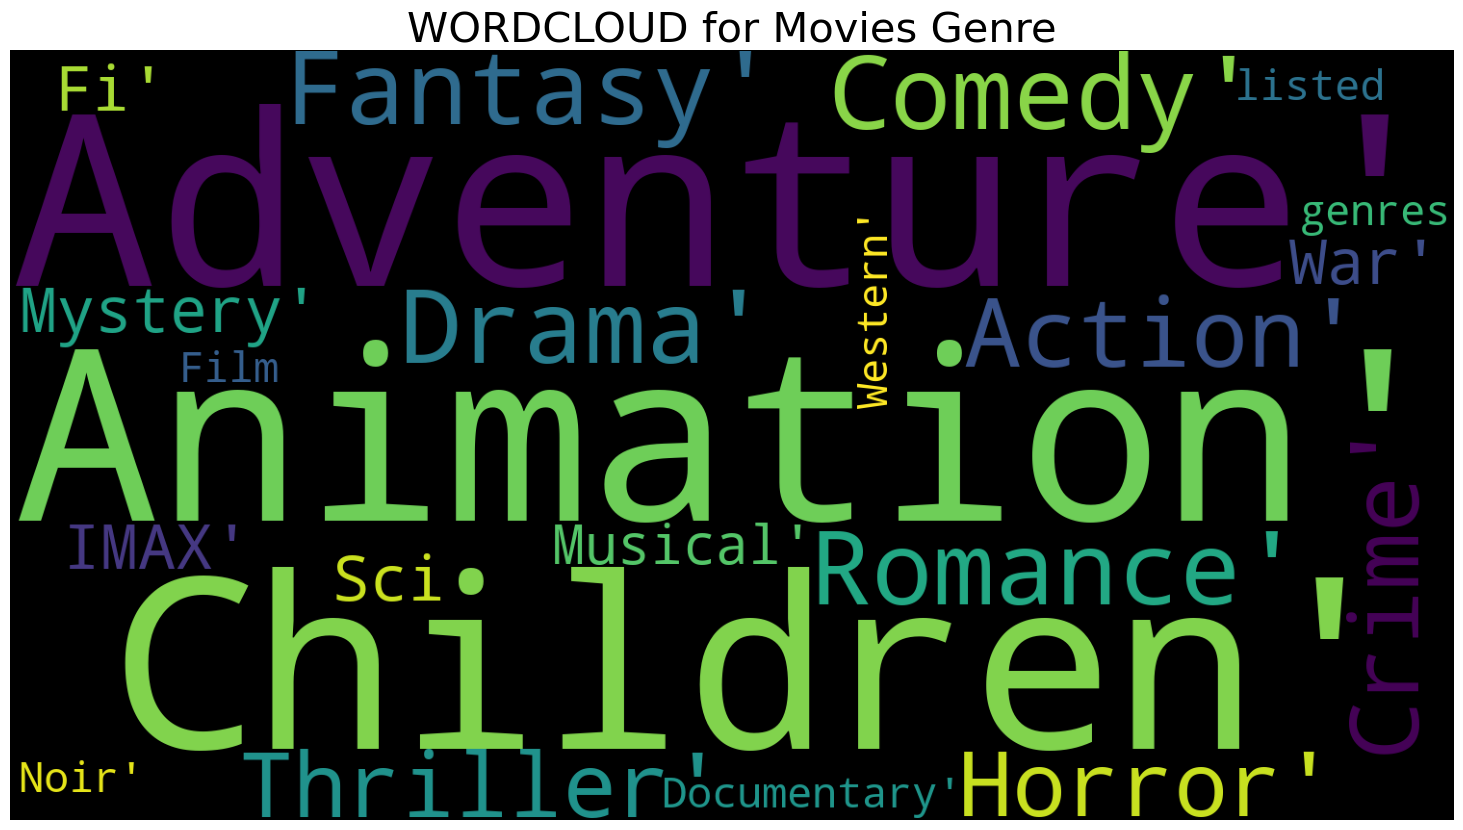

In [14]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre);

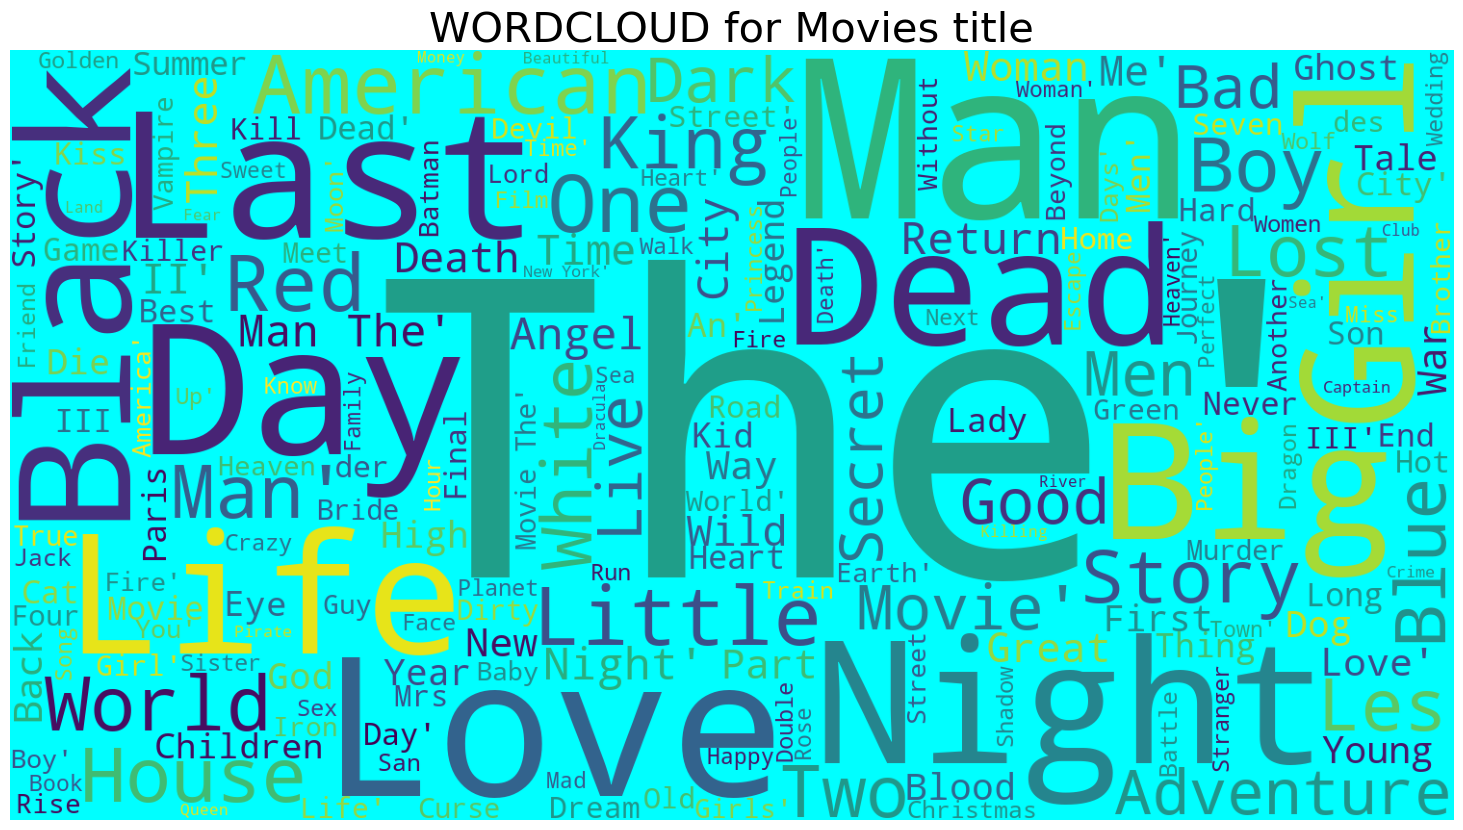

In [15]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title);

In [16]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [17]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


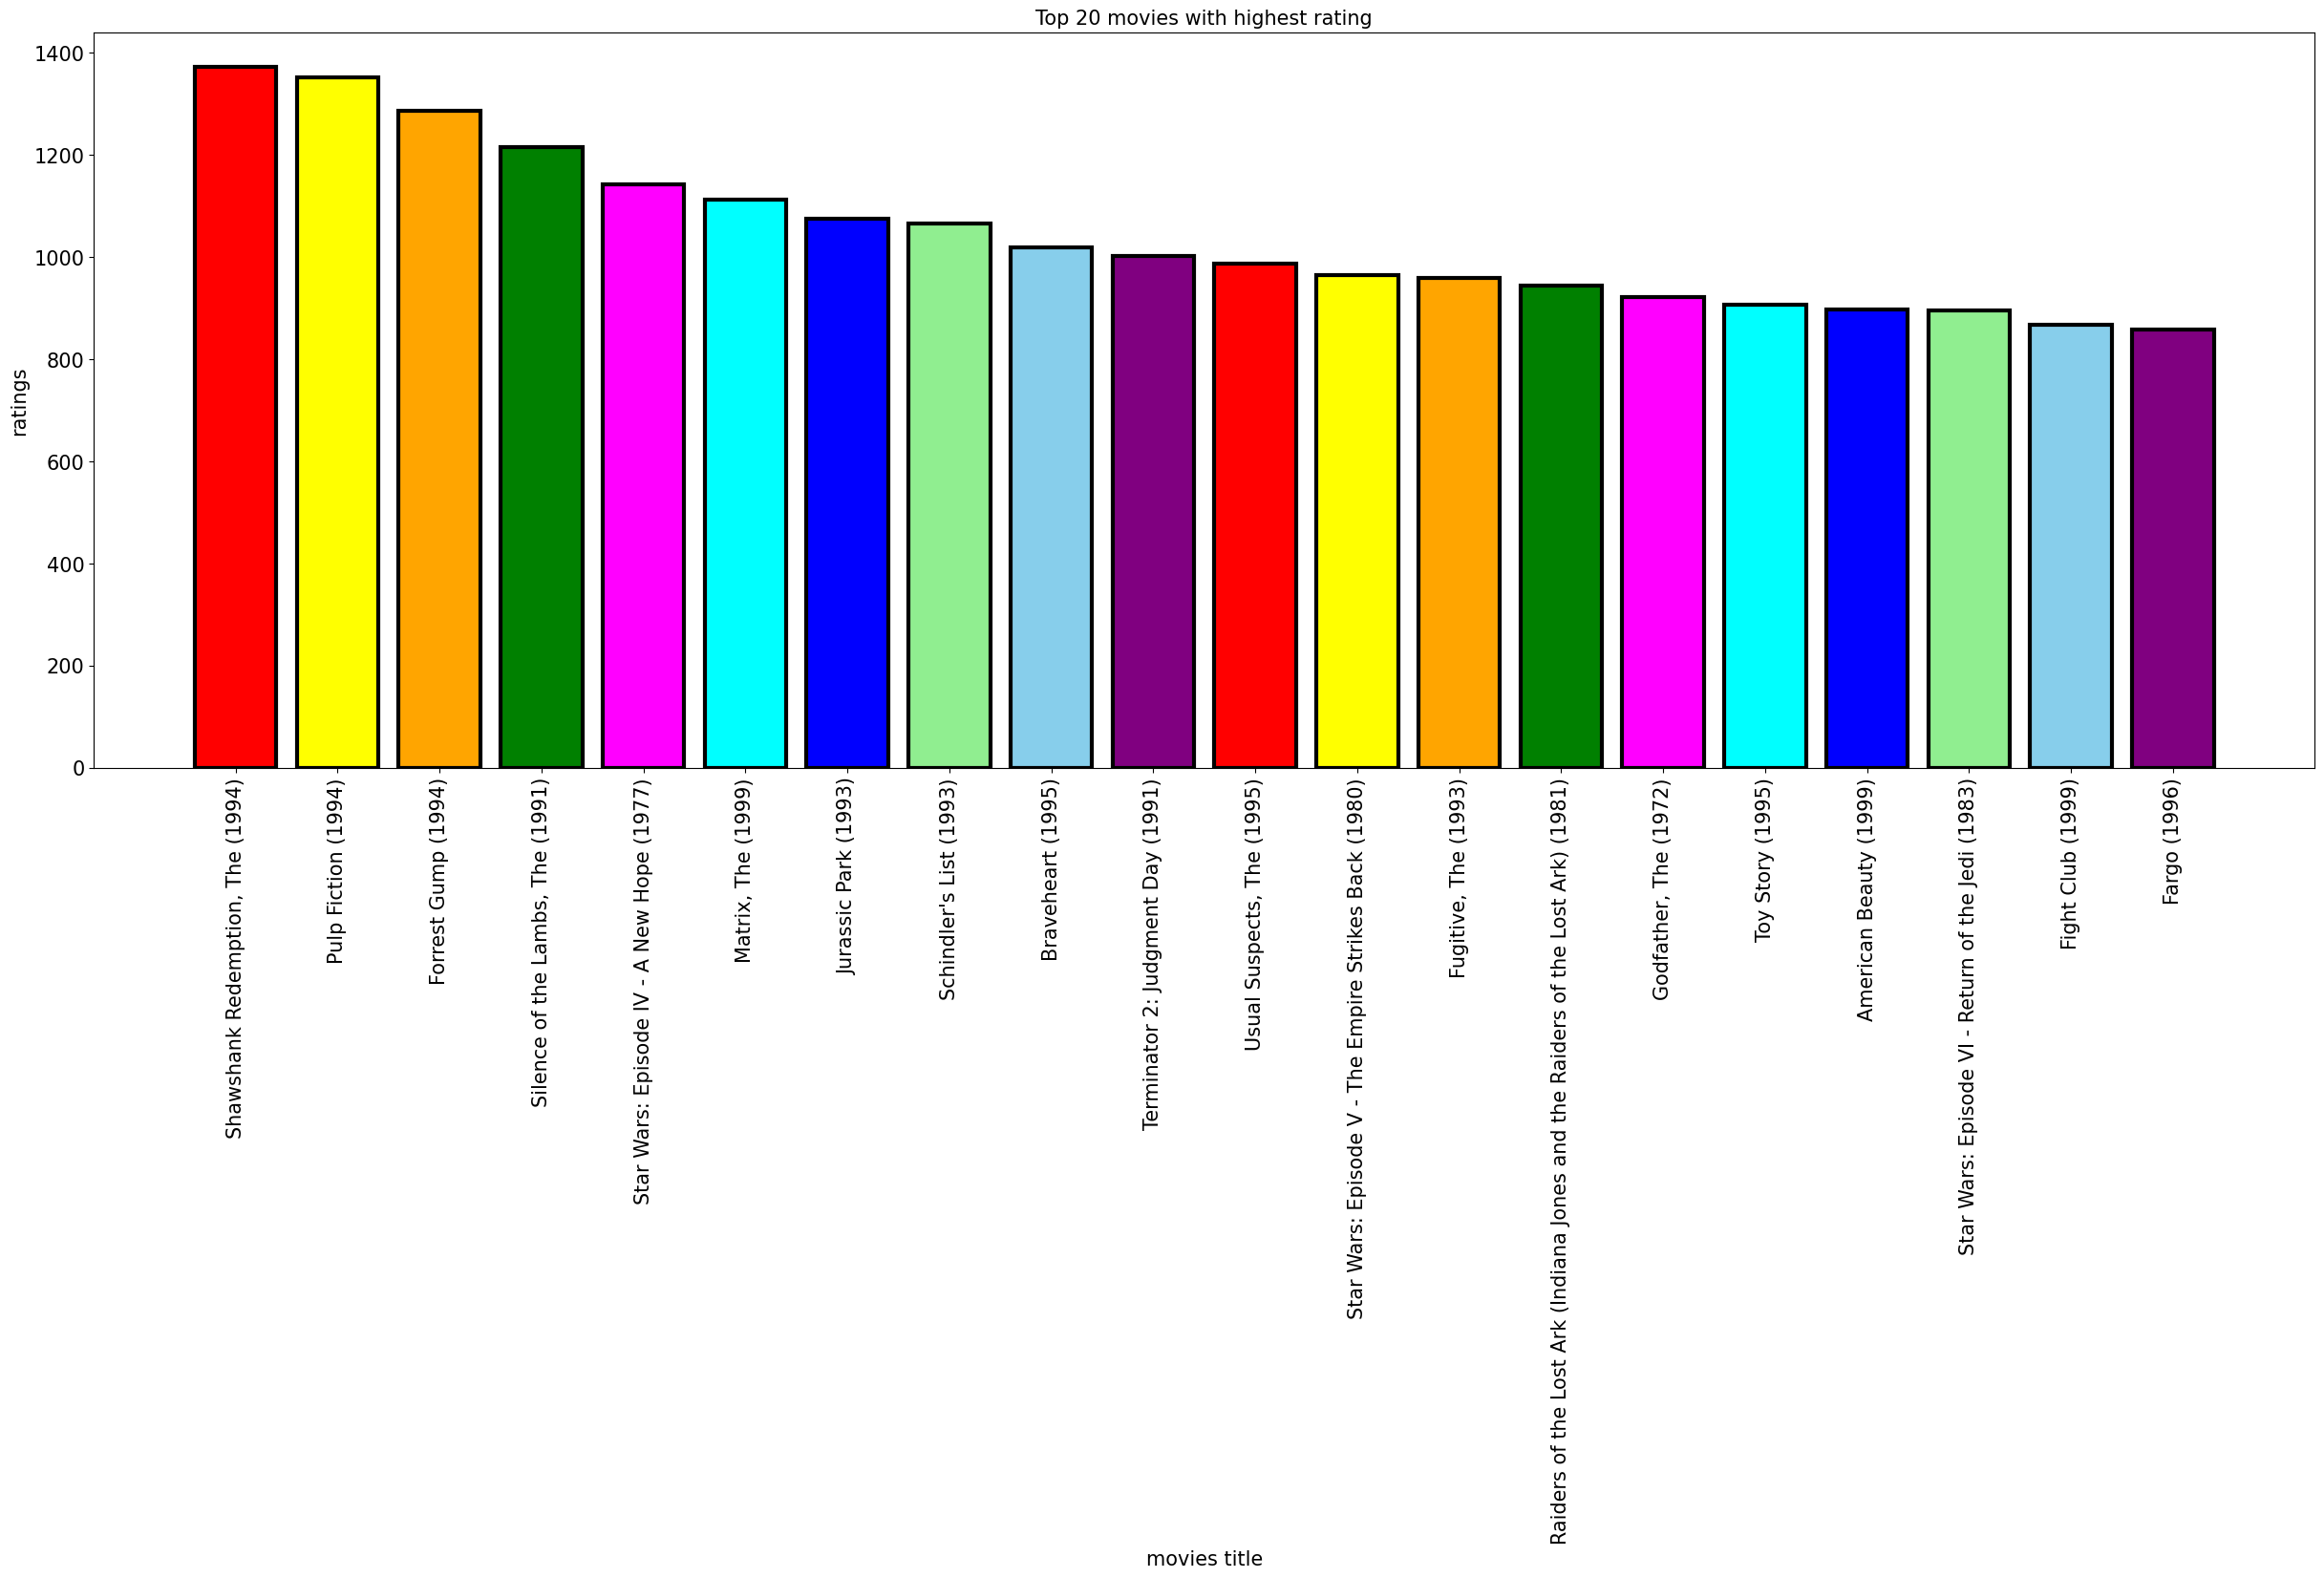

In [19]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=15)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('movies title',fontsize=15)
plt.yticks(fontsize=15)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='black',color=colors);

In [20]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


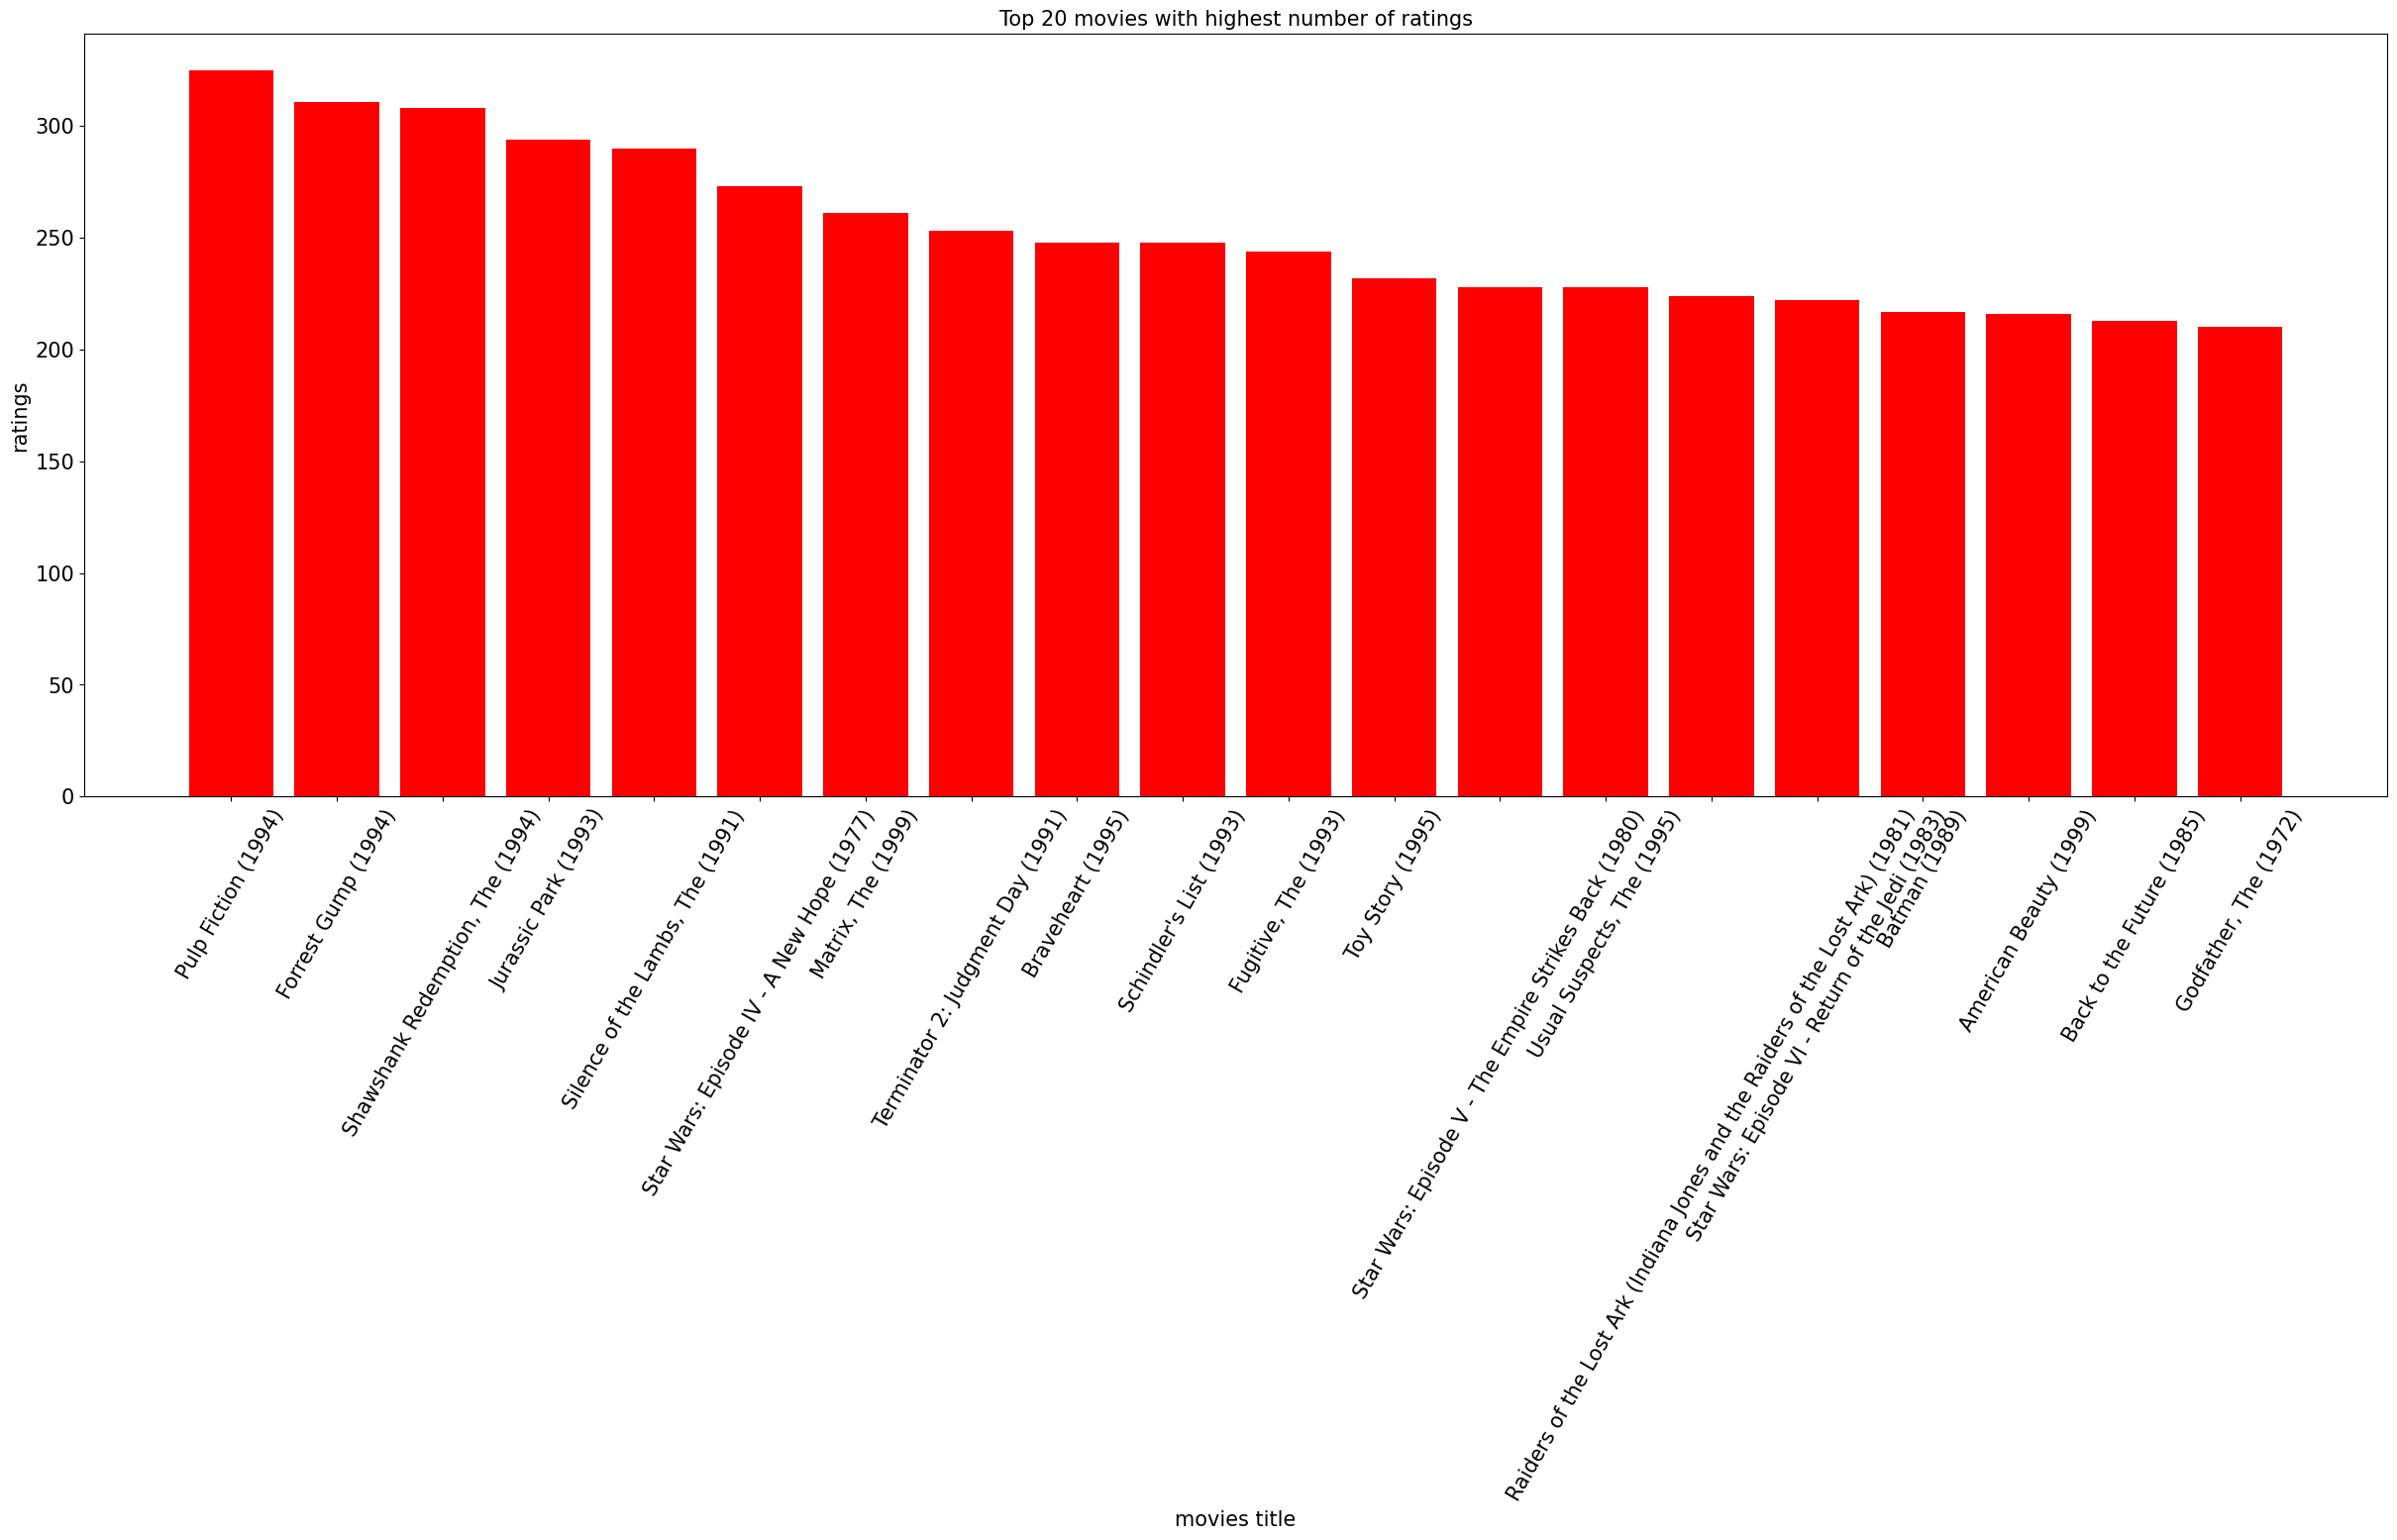

In [24]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=15)
plt.xticks(fontsize=15,rotation=60)
plt.yticks(fontsize=15)
plt.xlabel('movies title',fontsize=15)
plt.ylabel('ratings',fontsize=15)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red');

In [25]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

# Using Cosine Similarity

In [26]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [28]:
recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

# Using KNN

In [29]:
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors model with cosine similarity
knn = NearestNeighbors(metric='cosine')
knn.fit(tfidf_matrix)

NearestNeighbors(metric='cosine')

In [30]:
def movie_recommendations(movie_title, num_recommendations=5):
    # Find the index of the given movie title
    movie_index = movies[movies['title'] == movie_title].index[0]

    # Find the nearest neighbors of the chosen movie
    distances, indices = knn.kneighbors(tfidf_matrix[movie_index])

    # Print the recommended movies
    print("Recommendations for", movie_title, ":")
    for index in indices.flatten()[1:num_recommendations+1]:
        print(movies.iloc[index]['title'])

In [31]:
movie_recommendations('Toy Story (1995)', num_recommendations=5)

Recommendations for Toy Story (1995) :
DuckTales: The Movie - Treasure of the Lost Lamp (1990)
Adventures of Rocky and Bullwinkle, The (2000)
Monsters, Inc. (2001)
Antz (1998)


### To be continue . . . .